# Unsupervised Learning : HELP NGO Case Study

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# 1. Read and Understand the Data 

In [1]:
# import required libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset

country_data = pd.read_csv('Country-Data.csv')

In [3]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Info 
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Observe the values spread with describe function
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# See the shape of dataframe
country_data.shape

(167, 10)

# 2. EDA

In [7]:
# Null Check
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No Null Values!!

In [8]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


As given in the data dictionary the columns exports,health and imports are given as percentage of GDP value. Hence we will convert these columns to their original numbers.

In [9]:
country_data['exports'] = (country_data['gdpp']*country_data['exports'])/100

In [10]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
country_data['health'] = (country_data['gdpp']*country_data['health'])/100
country_data['imports'] = (country_data['gdpp']*country_data['imports'])/100

In [12]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


As we can see in the above dataframe the % values for columns exports, health and imports are converted to their actual numbers.

###### Univariate, Bi-Variate and Multi-Variate Analysis

In [13]:
# Make sure that there are no multiple entries for a country : length of unique values should be 167
len(country_data['country'].unique())

167

In [14]:
# See the correlation between variables
country_data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


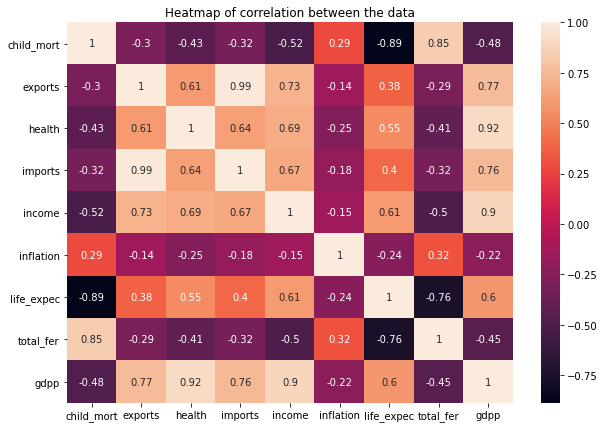

In [15]:
# PLot the correlation in heatmap
plt.figure(figsize=(10,7))
sns.heatmap(country_data.corr(), annot=True)
plt.title("Heatmap of correlation between the data")
plt.show()

We can see that exports, imports, health, income and life_expectancy have high correlation with gdp. Life Expectancy has negative correlation with child_mortality and total_fertility

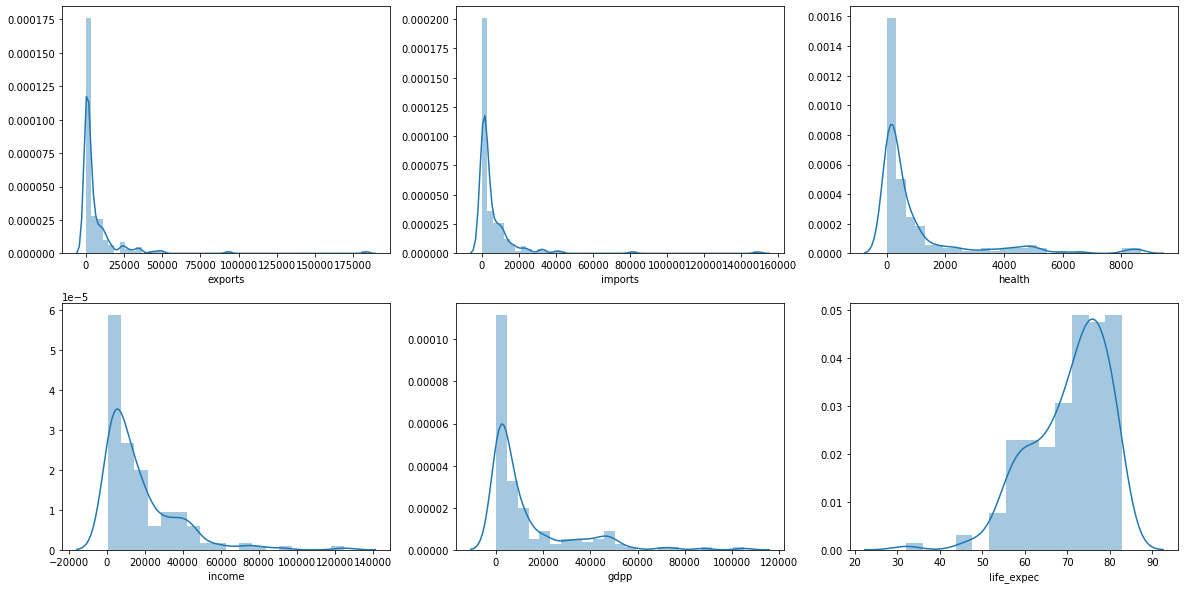

In [16]:
# Lets plot a dist plot for exports, imports, health
cols = ['exports','imports','health','income', 'gdpp','life_expec']
plt.figure(figsize=(20,10))
for i in enumerate(cols):
    plt.subplot(2,3,i[0]+1)
    sns.distplot(country_data[i[1]])
    plt.xlabel(i[1])

GDP, Income and Life_Expectancy are having different pattern

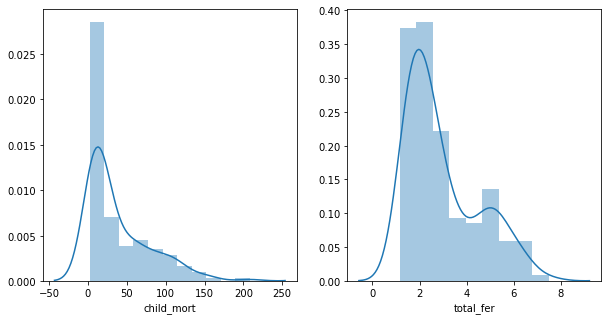

In [17]:
# Dist plot for child_mortality and total_fetrility

cols2 = ['child_mort','total_fer']
plt.figure(figsize=(10,5))
for i in enumerate(cols2):
    plt.subplot(1,2,i[0]+1)
    sns.distplot(country_data[i[1]])
    plt.xlabel(i[1])


The patterns are different for child mortality and total_fer rates.

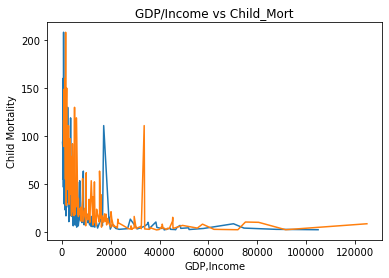

In [18]:
plt.plot('gdpp','child_mort',data=country_data.sort_values(by=['gdpp','child_mort']))
plt.plot('income','child_mort',data=country_data.sort_values(by=['income','child_mort']))
plt.title("GDP/Income vs Child_Mort")
plt.xlabel('GDP,Income')
plt.ylabel('Child Mortality')
plt.show()

We can see that as the GDP/ Income of the country increases the child_mortality rate decreases.

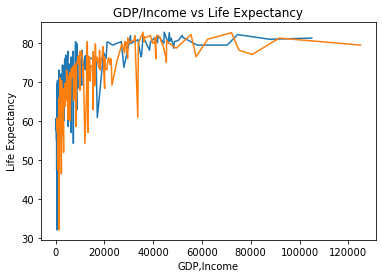

In [19]:
plt.plot('gdpp','life_expec',data=country_data.sort_values(by=['gdpp','life_expec']))
plt.plot('income','life_expec',data=country_data.sort_values(by=['income','life_expec']))
plt.title("GDP/Income vs Life Expectancy")
plt.xlabel('GDP,Income')
plt.ylabel('Life Expectancy')
plt.show()

Also the life expectancy increases as GDP/Income increases

###### Outliers and Treatment of Outliers

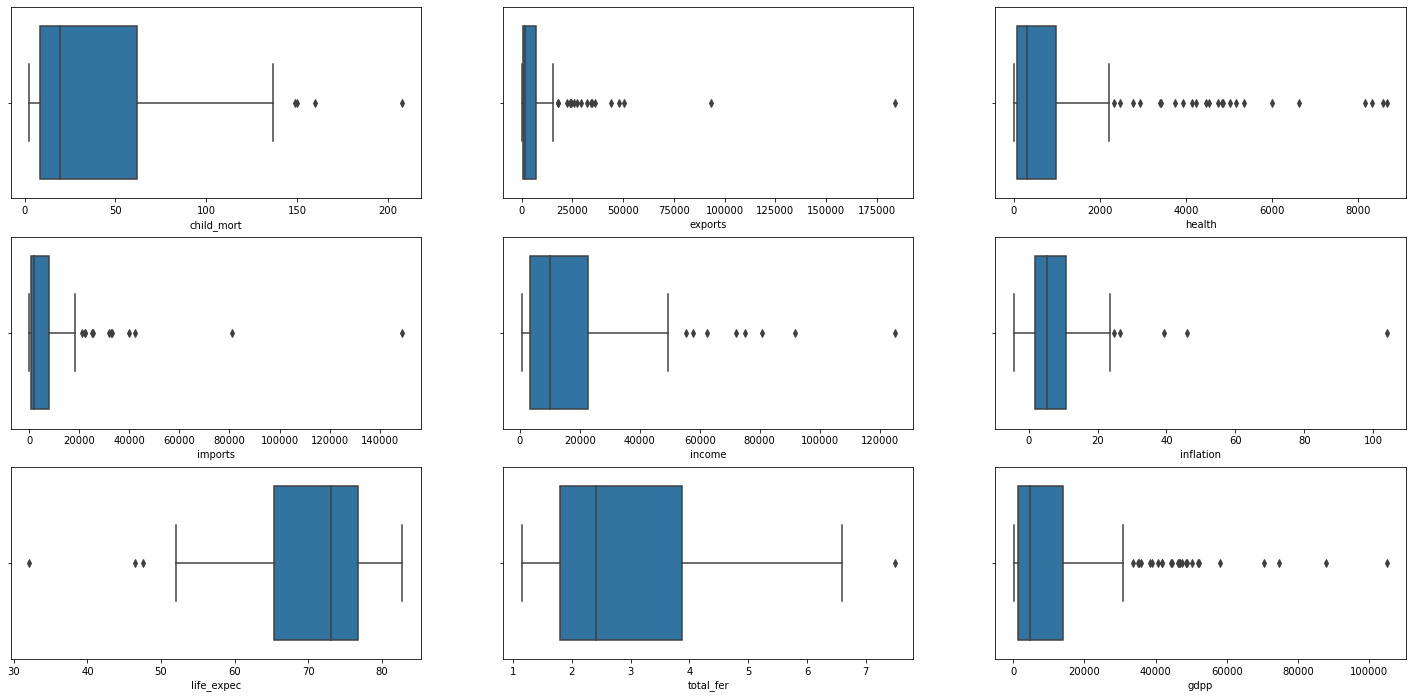

In [20]:
# Plot a box plot and observe the outliers
num_vars = list(country_data.columns)
num_vars.remove('country')

plt.figure(figsize = (25,12))
for i in enumerate(num_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_data[i[1]])
plt.show()

As we can see above there are outliers for child_mort, exports, health, imports, income, inflation, life_expect, total_fer, gdpp

- Since the NGO should not miss any country that is having more child_mort rate, we would not be dealing with outliers for the same.
- For gdpp, total_fer,inflation, income we will cap the upper bound outliers with some quantile values(which are mentioned below).
- For life_expec, we have outliers in lower bound. We will not be dealing with them as the NGO should not miss the countries with lower life expectancy rates.
- Since we are capping the GDP we will also cap the import, exports and health as they are % of GDP.

1. For GDPP we will see the quantiles of 0.9,0.95 and 0.99

In [21]:
# Outlier treatment for gdpp
country_data['gdpp'].describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

In [22]:
country_data['gdpp'].quantile(q=[0.9,0.95,0.99])

0.90    41840.0
0.95    48610.0
0.99    79088.0
Name: gdpp, dtype: float64

In [23]:
len(country_data[country_data['gdpp']>country_data['gdpp'].quantile(0.95)]), len(country_data[country_data['gdpp']>country_data['gdpp'].quantile(0.99)])

(9, 2)

As there are only 2 records with greater than 99%ile and 9 with greater than 99%ile, we will set the capping value as 95%ile

In [24]:
country_data[country_data['gdpp']>country_data['gdpp'].quantile(0.95)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300
144,Sweden,3.0,24070.2,5017.23,21204.7,42900,0.991,81.5,1.98,52100
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600


In [25]:
# Capping the gdpp value which is more than 0.95%ile with 0.95%ile
q_gdp = country_data['gdpp'].quantile(0.95)

In [26]:
country_data['gdpp'] = np.where(country_data['gdpp']>q_gdp, q_gdp, country_data['gdpp'])

In [27]:
country_data['gdpp'].describe()

count      167.000000
mean     11998.826347
std      15158.213199
min        231.000000
25%       1330.000000
50%       4660.000000
75%      14050.000000
max      48610.000000
Name: gdpp, dtype: float64

In [28]:
# Outlier treatment for gdpp
country_data['imports'].describe()

count       167.000000
mean       6588.352108
std       14710.810418
min           0.651092
25%         640.215000
50%        2045.580000
75%        7719.600000
max      149100.000000
Name: imports, dtype: float64

In [29]:
country_data['imports'].quantile(q=[0.9,0.95,0.99])

0.90    15034.28
0.95    24241.56
0.99    55371.39
Name: imports, dtype: float64

In [30]:
len(country_data[country_data['imports']>country_data['imports'].quantile(0.95)]), len(country_data[country_data['imports']>country_data['imports'].quantile(0.99)])

(9, 2)

As there are only 2 records with greater than 99%ile and 9 with greater than 99%ile, we will set the capping value as 95%ile

In [31]:
# Cap the imports values which are greater than 0.95%ile with 0.95%ile
q_imports = country_data['imports'].quantile(0.95)
q_imports

24241.55999999997

In [32]:
country_data['imports'] = np.where(country_data['imports']>q_imports, q_imports, country_data['imports'])

In [33]:
country_data['imports'].describe()

count      167.000000
mean      5140.089474
std       6696.210005
min          0.651092
25%        640.215000
50%       2045.580000
75%       7719.600000
max      24241.560000
Name: imports, dtype: float64

In [34]:
country_data['exports'].describe()

count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
25%         447.140000
50%        1777.440000
75%        7278.000000
max      183750.000000
Name: exports, dtype: float64

In [35]:
country_data['exports'].quantile([0.9,0.95,0.99])

0.90    17760.60
0.95    31385.10
0.99    64794.26
Name: exports, dtype: float64

In [36]:
len(country_data[country_data['exports']>country_data['exports'].quantile(0.95)]), len(country_data[country_data['exports']>country_data['exports'].quantile(0.99)])

(9, 2)

As there are only 2 records with greater than 99%ile and 9 with greater than 99%ile, we will set the capping value as 95%ile

In [37]:
q_exports = country_data['exports'].quantile(0.95)
q_exports

31385.09999999997

In [38]:
# Cap the exports values which are greater than 0.95%ile with 0.95%ile
country_data['exports'] = np.where(country_data['exports']>q_exports, q_exports, country_data['exports'])

In [39]:
country_data['exports'].describe()

count      167.000000
mean      5783.114656
std       8580.053847
min          1.076920
25%        447.140000
50%       1777.440000
75%       7278.000000
max      31385.100000
Name: exports, dtype: float64

In [40]:
# Outlier treatment for health
country_data['health'].describe()

count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
max      8663.600000
Name: health, dtype: float64

In [41]:
country_data['health'].quantile([0.9,0.95,0.99])

0.90    3825.4160
0.95    4966.7010
0.99    8410.3304
Name: health, dtype: float64

In [42]:
len(country_data[country_data['health']>country_data['health'].quantile(0.95)]), len(country_data[country_data['health']>country_data['health'].quantile(0.99)])

(9, 2)

As there are only 2 records with greater than 99%ile and 9 with greater than 99%ile, we will set the capping value as 95%ile

In [43]:
q_health = country_data['health'].quantile(0.95)
q_health

4966.700999999998

In [44]:
# Cap the health values which are greater than 0.95%ile with 0.95%ile
country_data['health'] = np.where(country_data['health']>q_health,q_health,country_data['health'])

In [45]:
country_data.health.describe()

count     167.000000
mean      954.012480
std      1453.426636
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
max      4966.701000
Name: health, dtype: float64

In [46]:
# Outlier treatment for income
country_data['income'].describe()

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

In [47]:
country_data['income'].quantile([0.9,0.95,0.99])

0.90    41220.0
0.95    48290.0
0.99    84374.0
Name: income, dtype: float64

In [48]:
len(country_data[country_data['income']>country_data['income'].quantile(0.95)]), len(country_data[country_data['income']>country_data['income'].quantile(0.99)])

(9, 2)

As there are only 2 records with greater than 99%ile and 9 with greater than 99%ile, we will set the capping value as 95%ile

In [49]:
q_income = country_data['income'].quantile(0.95)
q_income

48289.999999999956

In [50]:
# Cap the income values which are greater than 0.95%ile with 0.95%ile
country_data['income'] = np.where(country_data['income']>q_income,q_income,country_data['income'])

In [51]:
country_data['income'].describe()

count      167.000000
mean     15738.760479
std      14787.154215
min        609.000000
25%       3355.000000
50%       9960.000000
75%      22800.000000
max      48290.000000
Name: income, dtype: float64

In [52]:
# Outlier treatment for total_fer
country_data['total_fer'].describe()

count    167.000000
mean       2.947964
std        1.513848
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
max        7.490000
Name: total_fer, dtype: float64

In [53]:
country_data['total_fer'].quantile([0.9,0.95,0.99])

0.90    5.3220
0.95    5.8610
0.99    6.5636
Name: total_fer, dtype: float64

In [54]:
len(country_data[country_data['total_fer']>country_data['total_fer'].quantile(0.95)]), len(country_data[country_data['total_fer']>country_data['total_fer'].quantile(0.99)])

(9, 2)

As there are only 2 records with greater than 99%ile and 9 with greater than 99%ile, we will set the capping value as 95%ile

In [55]:
q_total_fer = country_data['total_fer'].quantile(0.95)
q_total_fer

5.861

In [56]:
# Cap the total_fer values which are greater than 0.95%ile with 0.95%ile
country_data['total_fer'] = np.where(country_data['total_fer']>q_total_fer, q_total_fer, country_data['total_fer'])

In [57]:
country_data['total_fer'].describe()

count    167.000000
mean       2.917479
std        1.443771
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
max        5.861000
Name: total_fer, dtype: float64

In [58]:
# Outlier treatment for inflation
country_data['inflation'].describe()

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
max      104.000000
Name: inflation, dtype: float64

In [59]:
country_data['inflation'].quantile([0.9,0.95,0.99])

0.90    16.640
0.95    20.870
0.99    41.478
Name: inflation, dtype: float64

In [60]:
len(country_data[country_data['inflation']>country_data['inflation'].quantile(0.95)]), len(country_data[country_data['inflation']>country_data['inflation'].quantile(0.99)])

(9, 2)

As there are only 2 records with greater than 99%ile and 9 with greater than 99%ile, we will set the capping value as 95%ile

In [61]:
q_inflation = country_data['inflation'].quantile(0.95)
q_inflation

20.869999999999997

In [62]:
country_data['inflation'] = np.where(country_data['inflation']>q_inflation, q_inflation, country_data['inflation'])

In [63]:
country_data['inflation'].describe()

count    167.000000
mean       6.929317
std        6.384357
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
max       20.870000
Name: inflation, dtype: float64

In [64]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,5783.114656,954.012480,5140.089474,15738.760479,6.929317,70.555689,2.917479,11998.826347
std,40.328931,8580.053847,1453.426636,6696.210005,14787.154215,6.384357,8.893172,1.443771,15158.213199
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,82.800000,5.861000,48610.000000


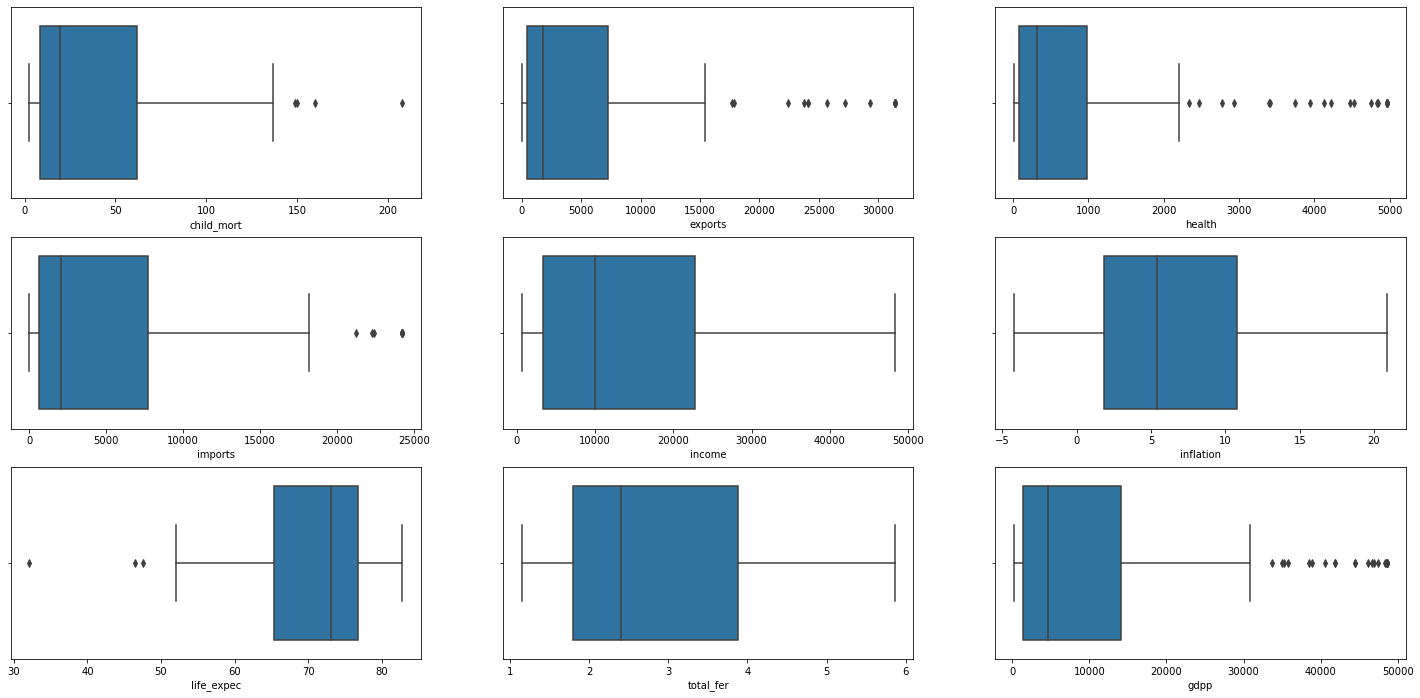

In [65]:
# Plot a box plot and observe the outliers again
num_vars = list(country_data.columns)
num_vars.remove('country')

plt.figure(figsize = (25,12))
for i in enumerate(num_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_data[i[1]])
plt.show()

We still have some outliers but we will keep them as is for now.

# 3. Prepare Data for Modelling

Let us scale the data using Standard Scaler so that the data will be prepared for modelling

In [66]:
scaler = StandardScaler()

In [67]:
# See the columns and get the list of columns used for clustering
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [68]:
num_vars = list(country_data.columns)

In [69]:
num_vars.remove('country')

In [70]:
num_vars

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [71]:
# create a dataframe with the selected columns

clustering_df = country_data[num_vars]

In [72]:
clustering_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0


In [73]:
clustering_df = scaler.fit_transform(clustering_df)

In [74]:
# See the scaled data
clustering_df

array([[ 1.29153238, -0.66958102, -0.62943544, ..., -1.61909203,
         2.01642065, -0.75736169],
       [-0.5389489 , -0.54217181, -0.47348864, ...,  0.64786643,
        -0.88053487, -0.52332107],
       [-0.27283273, -0.47583812, -0.53001667, ...,  0.67042323,
        -0.01909006, -0.49883845],
       ...,
       [-0.37231541, -0.56578559, -0.59652699, ...,  0.28695762,
        -0.6721208 , -0.70727157],
       [ 0.44841668, -0.63010392, -0.61153387, ..., -0.34463279,
         1.21750006, -0.70727157],
       [ 1.11495062, -0.61289625, -0.59901824, ..., -2.09278484,
         1.72464096, -0.69734618]])

In [75]:
# As the clustering_df is a series, converting it to a dataframe
clustering_df = pd.DataFrame(clustering_df)

In [76]:
clustering_df.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.394438,-1.619092,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.383226,0.647866,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,1.440750,0.670423,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,2.190136,-1.179234,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.862393,0.704258,-0.547072,0.013312


In [77]:
clustering_df.columns = num_vars

In [78]:
clustering_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.394438,-1.619092,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.383226,0.647866,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,1.440750,0.670423,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,2.190136,-1.179234,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.862393,0.704258,-0.547072,0.013312


## Hopkins Statistic

In [79]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [80]:
for i in range(0,10):
    print(hopkins(clustering_df))

0.8688697328299269
0.8521706689134186
0.870058486451767
0.874477161233364
0.8800352522778437
0.8547396888852204
0.8577807813862928
0.8710461286322999
0.8448664481285058
0.8509982038045338


The Hopkins statstic is between 0.8 - 0.9 which means that the dataset is good for clustering

# 4. Modelling using KMeans

In [81]:
clustering_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.394438,-1.619092,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.383226,0.647866,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,1.440750,0.670423,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,2.190136,-1.179234,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.862393,0.704258,-0.547072,0.013312


In [82]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centro

In [83]:
# Arbitary cluster number = 4. Just to see the data split
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=100)
kmeans.fit(clustering_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [84]:
kmeans.labels_

array([0, 2, 2, 0, 3, 2, 2, 1, 1, 2, 3, 3, 2, 3, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 3, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 3, 3, 3,
       1, 2, 2, 2, 2, 0, 0, 3, 2, 1, 1, 0, 0, 2, 1, 0, 3, 2, 2, 0, 0, 2,
       0, 3, 1, 2, 2, 2, 2, 1, 3, 3, 2, 3, 2, 2, 0, 0, 3, 2, 0, 3, 2, 0,
       0, 2, 3, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 3, 0, 0, 1, 3, 0, 2, 2, 2, 2, 3, 3, 1, 2, 2, 0, 2, 3, 0, 2, 3,
       0, 1, 3, 3, 2, 2, 3, 3, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 3, 1, 2, 2, 2, 2, 2, 0, 0])

In [85]:
len(kmeans.labels_)

167

## Finding optimal number of clusters

In [86]:
# Calculate the Sum of Squared Distances for samples from their nearest cluster and also silhouette score for differen clusters
# starting from 2 to 10

ssd = []
silhouette_avg = []
range_n_clusters = [i for i in range(2,11)]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(clustering_df)
    ssd.append({'num_clusters':num_clusters,'SSD':kmeans.inertia_})
    
    cluster_labels = kmeans.labels_
    
    #silhouette avg
    silhouette_avg.append({
        'num_clusters':num_clusters, 'silhouette_avg':silhouette_score(clustering_df, cluster_labels)
    })


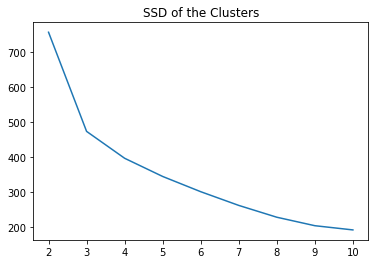

In [87]:
# Plot the elbow curve
ssd_df = pd.DataFrame(ssd)
# PLot the Inertia/SSD for each n_clusters
plt.plot(ssd_df['num_clusters'],ssd_df['SSD'])
plt.title("SSD of the Clusters")
plt.show()

According to the elbow curve, the curve started flattening at point 3. The SSD value is slowly reducing from from k=3 compared to k < 3

In [88]:
# See the sum of squared distances for points from their nearest cluster center
ssd_df

,num_clusters,SSD
0,2,757.378725
1,3,474.170984
2,4,397.371171
3,5,345.387884
4,6,301.874393
5,7,262.699644
6,8,228.943102
7,9,204.744617
8,10,192.712273


In [89]:
# Silhouette Analysis
silhouette_avg

[{'num_clusters': 2, 'silhouette_avg': 0.48364311092151696},
 {'num_clusters': 3, 'silhouette_avg': 0.41077871491567836},
 {'num_clusters': 4, 'silhouette_avg': 0.37822169639408804},
 {'num_clusters': 5, 'silhouette_avg': 0.28687072804259073},
 {'num_clusters': 6, 'silhouette_avg': 0.3061881361698527},
 {'num_clusters': 7, 'silhouette_avg': 0.32039663492029885},
 {'num_clusters': 8, 'silhouette_avg': 0.3294658770895955},
 {'num_clusters': 9, 'silhouette_avg': 0.3299132277676147},
 {'num_clusters': 10, 'silhouette_avg': 0.29318046338524545}]

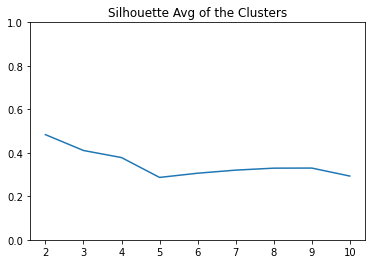

In [90]:
# Plot the Silhouette curve
silhouette_avg = pd.DataFrame(silhouette_avg)
plt.plot(silhouette_avg['num_clusters'],silhouette_avg['silhouette_avg'])
plt.title("Silhouette Avg of the Clusters")
plt.ylim(0,1)
plt.show()

Though the silhouette curve is maximized at k=2. Having 2 clusters will not make sense. The next highest score is for k=3.

Based on the elbow curve and silhouette curves plotted above, we have decided to go with final number of clusters as 3

In [91]:
# Final number of clusters = 3

kmeans = KMeans(n_clusters=3, max_iter=50, random_state=100)
kmeans.fit(clustering_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [92]:
# Number of cluster values(non-unique)
len(kmeans.labels_)

167

In [93]:
# Add a new column to the main dataframe country_data with the cluster ids
country_data['kmeans_clusters'] = kmeans.labels_

In [94]:
country_data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.820,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.650,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.890,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.870,60.1,5.861,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.130,12200.0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.870,75.8,2.370,10300.0,0
6,Armenia,18.1,669.76,141.6800,1458.660,6700.0,7.770,73.3,1.690,3220.0,0
7,Australia,4.8,10276.20,4530.8700,10847.100,41400.0,1.160,82.0,1.930,48610.0,1
8,Austria,4.3,24059.70,4966.7010,22418.200,43200.0,0.873,80.5,1.440,46900.0,1
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000.0,13.800,69.1,1.920,5840.0,0


In [95]:
# Identify number of countries in each cluster
country_data['kmeans_clusters'].value_counts().sort_index()

0    82
1    37
2    48
Name: kmeans_clusters, dtype: int64

## Profiling with the columns gdpp, child_mort and income

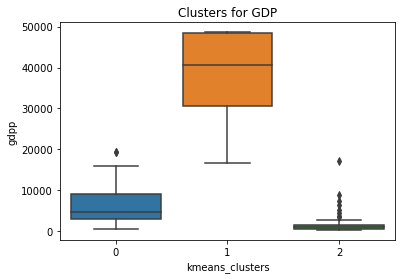

In [96]:
# Plot the clusters for gdpp
sns.boxplot(x='kmeans_clusters', y='gdpp', data = country_data)
plt.title("Clusters for GDP")
plt.show()

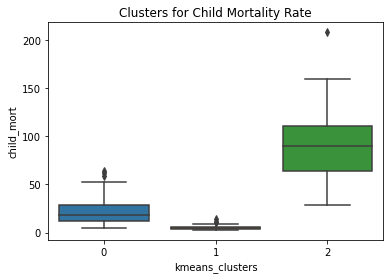

In [97]:
# Plot the clusters for child_mort
sns.boxplot(x='kmeans_clusters', y='child_mort', data = country_data)
plt.title("Clusters for Child Mortality Rate")
plt.show()

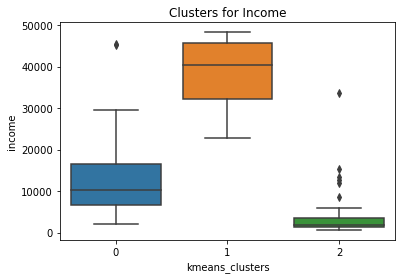

In [98]:
# Plot the clusters
sns.boxplot(x='kmeans_clusters', y='income', data = country_data)
plt.title("Clusters for Income")
plt.show()

Clearly from the above 3 plots we can see Cluster 2 is having countries with low income, high child mortality and low GDP.
The NGO should be targetting these countries in first place. 

Let's visualize the clusters in scatter plot

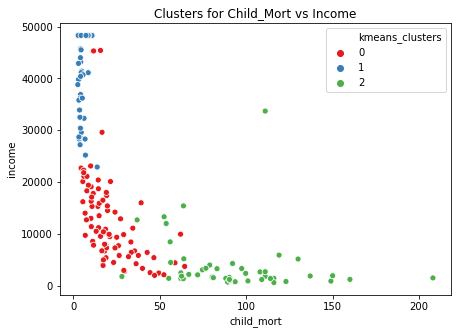

In [99]:
# Plotting the clusters in Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(x='child_mort', y='income', hue='kmeans_clusters', data=country_data, palette = 'Set1')
plt.title("Clusters for Child_Mort vs Income")
plt.show()

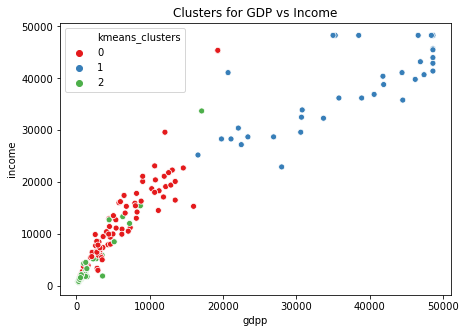

In [100]:
# Plotting the clusters in Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(x='gdpp', y='income', hue='kmeans_clusters', data=country_data, palette = 'Set1')
plt.title("Clusters for GDP vs Income")
plt.show()

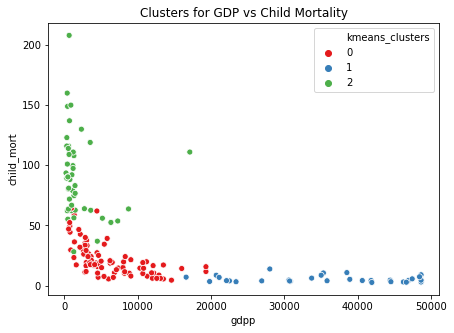

In [101]:
# Plotting the clusters in Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(x='gdpp', y='child_mort', hue='kmeans_clusters', data=country_data, palette = 'Set1')
plt.title("Clusters for GDP vs Child Mortality")
plt.show()


Listing down the top 5 countries in cluster 2

In [102]:
# Number of countries with cluster id as 2
len(country_data.loc[country_data['kmeans_clusters']==2])

48

In [103]:
# Top 5 Countries with low gdp, low income and high child_mort using KMeans Clustering
country_data.loc[country_data['kmeans_clusters']==2].sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399.0,2


# 5. Modelling using Hierarchical Clustering

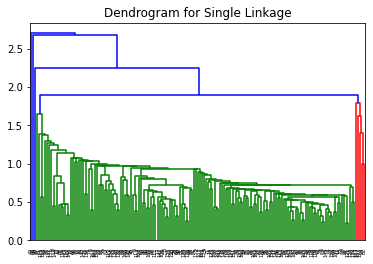

In [104]:
# Single Linkage

mergings = linkage(clustering_df, method='single',metric='euclidean')
dendrogram(mergings)
plt.title("Dendrogram for Single Linkage")
plt.show()

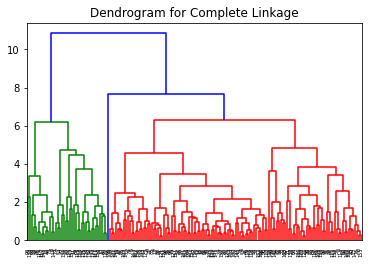

In [105]:
# Complete Linkage

mergings_complete = linkage(clustering_df, method='complete',metric='euclidean')
dendrogram(mergings_complete)
plt.title("Dendrogram for Complete Linkage")
plt.show()

From the above 2 dendrograms for single and complete linkage, we can clearly see that the clustering is more relavant in complete linkage. Hence we will try to cut the tree with n_clusters = 3 and 4 and see the results

In [106]:
# 3 clusters
cut_tree(mergings_complete, n_clusters=3)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [107]:
len(cut_tree(mergings_complete, n_clusters=3))

167

In [108]:
hierarchical_3_cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1,)

In [109]:
# See the cluster labels
hierarchical_3_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [110]:
# Create dataframe to store hierarchical cluster labels
hierarchical_cluster_labels = pd.DataFrame(hierarchical_3_cluster_labels)

In [111]:
hierarchical_cluster_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [112]:
# rename the column
hierarchical_cluster_labels.columns=['3']

In [113]:
# See the number of countries in each cluster n_clusters=3
hierarchical_cluster_labels['3'].value_counts().sort_index()

0    126
1     40
2      1
Name: 3, dtype: int64

In [114]:
# 4 clusters
cut_tree(mergings_complete, n_clusters=4)

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [2],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [3],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [0],
       [2],
    

In [115]:
len(cut_tree(mergings_complete, n_clusters=4))

167

In [116]:
hierarchical_4_cluster_labels = cut_tree(mergings_complete, n_clusters=4).reshape(-1,)

In [117]:
# See the clusters
hierarchical_4_cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       3, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [118]:
# store the clusters in dataframe already created hierarchical_cluster_labels by adding one more column
hierarchical_cluster_labels['4'] = hierarchical_4_cluster_labels

In [119]:
# See the number of countries in each cluster n_clusters=4
hierarchical_cluster_labels['4'].value_counts().sort_index()

0    47
1    79
2    40
3     1
Name: 4, dtype: int64

In [120]:
# See the number of countries in each cluster n_clusters=3
hierarchical_cluster_labels['3'].value_counts().sort_index()

0    126
1     40
2      1
Name: 3, dtype: int64

As we can see the countries are better clustered when the number of clusters is 4. This is because when n_clusters = 3 we have 166 countries in 2 clusters and 1 in 3rd one where as when n_clusters=4 we have 166 countries split in 3 clusters and 1 in the 4th one.

In [121]:
# Add hierarchical cluster labels when n_clusters=4 to the country_data dataframe

country_data['hierarchical_clusters'] = hierarchical_cluster_labels['4']

In [122]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters,hierarchical_clusters
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,0,1


## Profiling with the columns gdpp, child_mort and income

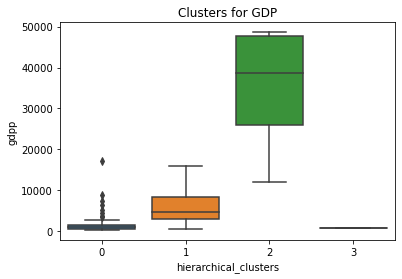

In [123]:
# Plot the clusters for gdpp
sns.boxplot(x='hierarchical_clusters', y='gdpp', data = country_data)
plt.title("Clusters for GDP")
plt.show()

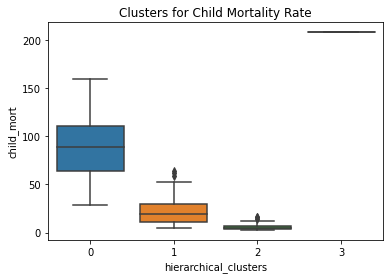

In [124]:
# Plot the clusters for child_mort
sns.boxplot(x='hierarchical_clusters', y='child_mort', data = country_data)
plt.title("Clusters for Child Mortality Rate")
plt.show()

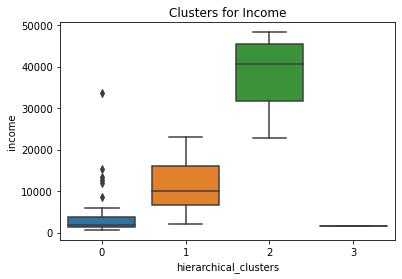

In [125]:
# Plot the clusters for child_mort
sns.boxplot(x='hierarchical_clusters', y='income', data = country_data)
plt.title("Clusters for Income")
plt.show()

We can interpret from the above graphs that the cluster 3 is having the country with very high child_mortality, very low income and very low gdp compared to other countries.
Also countries in cluster 0 are having high child_mortality, low income and low gdp rates.

Let us visualize the clusters in scatter plot

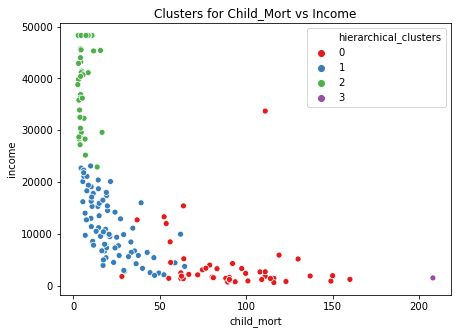

In [126]:
# Plotting the clusters in Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(x='child_mort', y='income', hue='hierarchical_clusters', data=country_data, palette = 'Set1')
plt.title("Clusters for Child_Mort vs Income")
plt.show()

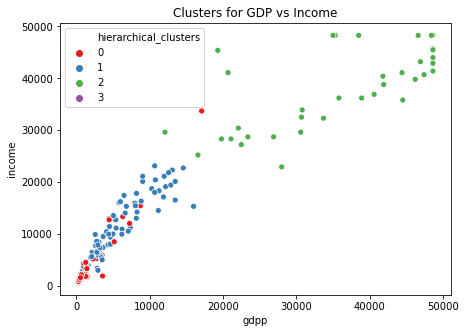

In [127]:
# Plotting the clusters in Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(x='gdpp', y='income', hue='hierarchical_clusters', data=country_data, palette = 'Set1')
plt.title("Clusters for GDP vs Income")
plt.show()

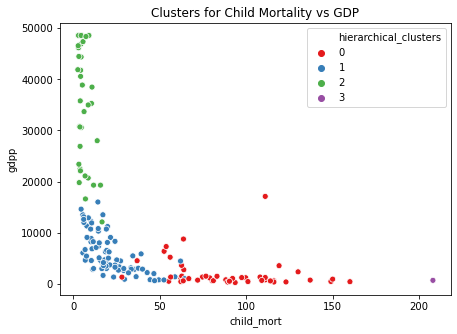

In [128]:
# Plotting the clusters in Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(x='child_mort', y='gdpp', hue='hierarchical_clusters', data=country_data, palette = 'Set1')
plt.title("Clusters for Child Mortality vs GDP")
plt.show()

Top 5 countries for NGO based on hierarchical clustering

In [129]:
country_data.loc[(country_data['hierarchical_clusters']==0) | (country_data['hierarchical_clusters']==3)]['hierarchical_clusters'].value_counts()

0    47
3     1
Name: hierarchical_clusters, dtype: int64

In [130]:
# Store the countries with clusters 0 and 3 in a dataframe
hierarchical_0_3_countries = country_data.loc[(country_data['hierarchical_clusters']==0) | (country_data['hierarchical_clusters']==3)]

In [131]:
# Sort the countries in the order of low gdp, low income and high child_mort rates
hierarchical_0_3_countries.sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters,hierarchical_clusters
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231.0,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327.0,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334.0,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348.0,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399.0,2,0


These top 5 countries with low gdp, low income and high child mortality rates are same when derived from KMeans and Hierarchical Clustering. Let's take a look at the country with cluster id 3(hierarchical)

In [132]:
# See the one country with cluster id 3
hierarchical_0_3_countries[hierarchical_0_3_countries['hierarchical_clusters']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters,hierarchical_clusters
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,2,3


Here the country with cluster if 3 is having the highest child_mortality rate. Hence we need to decide the preference of the profiling variables.

We will take the preference in the below order:

1. High Child Mortality Rate
2. Low GDPP
3. Low Income

Sorting the dataframe based on above preference

In [133]:
# Top 5 Countries which are in dire need based on hierarchical clustering
hierarchical_0_3_countries.sort_values(by=['child_mort','gdpp','income'], ascending=[False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters,hierarchical_clusters
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.330,662.0,2,3
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.200,399.0,2,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,5.861,897.0,2,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.210,446.0,2,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,5.861,708.0,2,0


Now let us sort the dataframe based on kmeans clusters implying the above preference

In [134]:
# Top 5 Countries which are in dire need based on kmeans clustering
country_data[country_data['kmeans_clusters']==2].sort_values(by=['child_mort','gdpp','income'], ascending=[False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters,hierarchical_clusters
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.330,662.0,2,3
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.200,399.0,2,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,5.861,897.0,2,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.210,446.0,2,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,5.861,708.0,2,0


The top 5 list is again the same!!!

### Hence we achieved the top 5 countries which are in dire need of help and which NGO should focus for utlizing its funds. They are Haiti, Sierra Leone, Chad, Central African Republic, Mali